In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
!tail complaints_dec_2014.csv


1136185,Consumer loan,Vehicle loan,Problems when you are unable to pay,,TX,78577,Web,12/01/2014,12/01/2014,JPMorgan Chase,Closed with explanation,Yes,
1136183,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",,NY,11230,Referral,12/01/2014,12/05/2014,PNC Bank,Closed,Yes,
1136180,Debt collection,"Other (phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,CA,92124,Web,12/01/2014,12/01/2014,Stellar Recovery Inc.,Closed with explanation,Yes,
1136175,Debt collection,Payday loan,False statements or representation,Attempted to collect wrong amount,IN,46637,Web,12/01/2014,12/01/2014,"Interstate Recovery Service, Inc.",Closed with explanation,No,
1136173,Credit reporting,,Incorrect information on credit report,Account status,VA,23224,Postal mail,12/01/2014,12/05/2014,Experian,Closed with explanation,Yes,Yes
1136172,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",,LA,70452,Web,12/01/2014,12/05/2014,"Servis One, Inc.",C

In [6]:
complaints_data = pd.read_csv("complaints_dec_2014.csv")

complaints_data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [7]:
complaints_data.describe()

,Complaint ID,ZIP code
count,11543.000000,11409.000000
mean,1157276.786451,50259.375756
std,11908.384438,30712.384693
min,1136157.000000,10.000000
25%,1146708.500000,23234.000000
50%,1156954.000000,44203.000000
75%,1167656.000000,78623.000000
max,1178091.000000,99712.000000


#Number of complaints by service

In [8]:
complaints_data.groupby("Product").size()

Product
Bank account or service    1136
Consumer loan               578
Credit card                1100
Credit reporting           2113
Debt collection            2942
Money transfers             107
Mortgage                   3002
Other financial service      14
Payday loan                 141
Prepaid card                 70
Student loan                340
dtype: int64

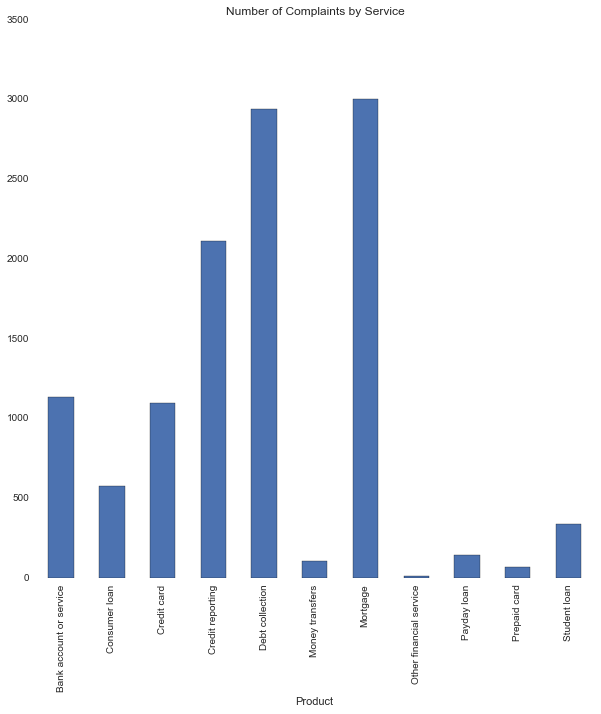

In [9]:
complaints_data.groupby("Product").size().plot(title="Number of Complaints by Service", figsize=(10,10), kind="bar")
                                              



> Judging by the data most complaints recieved are

>regarding morgages



#Number of Complaints by Top 10 Companies

In [10]:
complaints_data["Company"].value_counts()[0:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

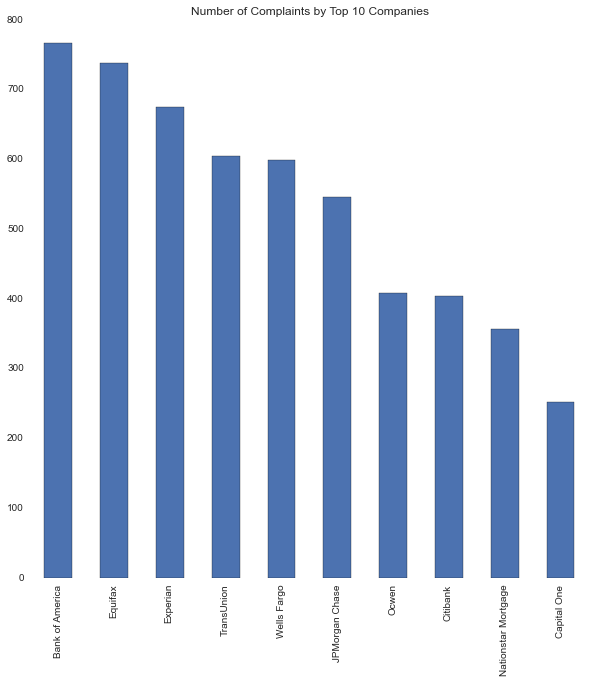

In [11]:
complaints_data["Company"].value_counts()[0:10].plot(title="Number of Complaints by Top 10 Companies", \
                                                     figsize=(10,10), kind="bar")

> Judging by the data Bank of America seems to have 

> the most complaints.

> Saying this, that is not enough information to make 

> any inferences because the graph does not compare

> amount of customers per company to complaints


#Number of Complaints by Company Response


In [12]:
complaints_data.groupby("Company response").size()

Company response
Closed                              239
Closed with explanation            8185
Closed with monetary relief         643
Closed with non-monetary relief    1253
In progress                        1056
Untimely response                   167
dtype: int64

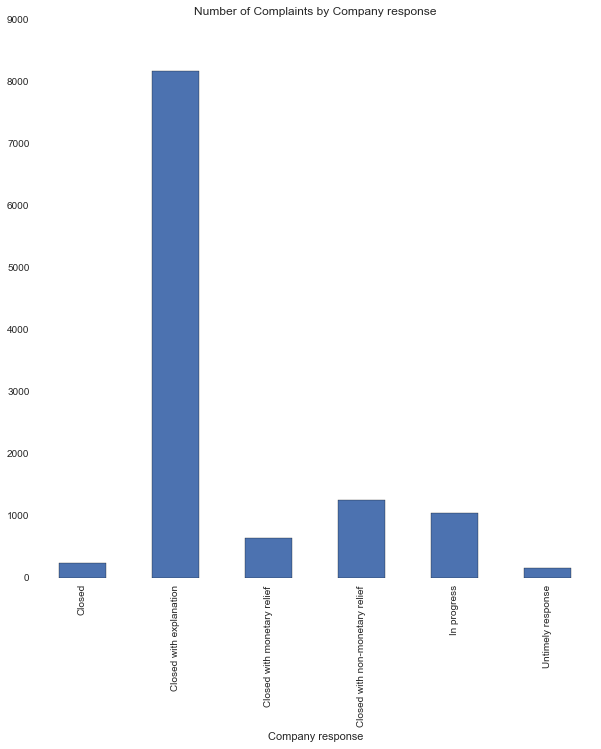

In [13]:
complaints_data.groupby("Company response").size().plot(title="Number of Complaints by Company response", figsize=(10,10), kind="bar")


>By looking at this graph, it can be inferred that

>most cases are reported "closed with explanation".

## Mean Number of Complaints by Day of the Week

In [57]:
new_data = pd.DatetimeIndex(complaints_data["Date sent to company"])
new_data
complaints_data['day'] = new_data.dayofweek
daily = complaints_data.day.value_counts().sort_index()

daily.index = ('mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun')

daily



mon      2609
tues     2450
wed      2540
thurs    1449
fri      1742
sat       429
sun       324
dtype: int64

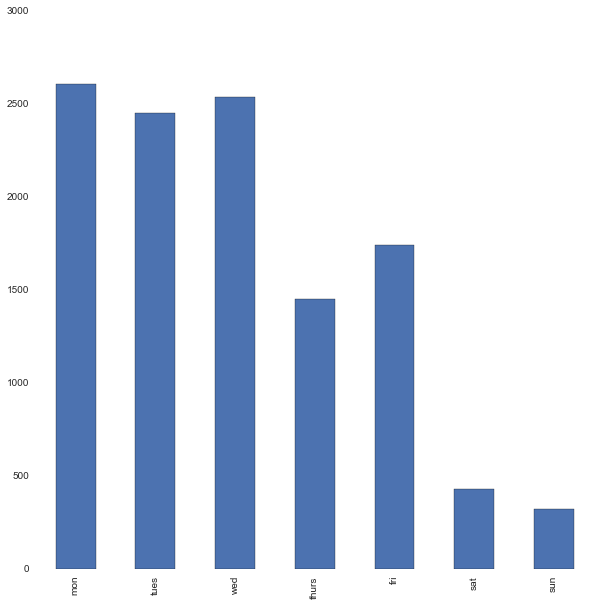

In [49]:
daily.plot(kind='bar', figsize=(10,10))

Most complaints are recorded on Mondays